In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

earthquake_data = pd.read_csv('all_month.csv')

# drop columns that are not needed
earthquake_data.drop(columns=['net', 'locationSource', 'magSource'], inplace=True)

earthquake_data.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2025-01-16T02:09:21.820Z,34.044667,-117.133333,6.410,1.39,ml,60.0,29.0,0.019650,0.1700,ci40840599,2025-01-16T02:14:01.618Z,"3 km S of Mentone, CA",earthquake,0.13,0.320,0.174000,27.0,automatic
1,2025-01-16T01:59:22.210Z,18.022667,-66.832500,16.260,2.42,md,12.0,131.0,0.060510,0.2200,pr71470933,2025-01-16T02:07:21.980Z,"2 km SE of Yauco, Puerto Rico",earthquake,0.50,0.880,0.075361,5.0,reviewed
2,2025-01-16T01:55:52.520Z,38.831333,-122.821335,2.270,0.48,md,9.0,129.0,0.011840,0.0100,nc75117811,2025-01-16T01:57:28.177Z,"8 km NNW of The Geysers, CA",earthquake,0.47,0.830,0.280000,9.0,automatic
3,2025-01-16T01:49:24.210Z,18.254500,-66.429000,39.020,2.30,md,10.0,117.0,0.089610,0.0700,pr71470923,2025-01-16T02:00:19.900Z,"5 km NW of Orocovis, Puerto Rico",earthquake,0.52,0.700,0.035800,6.0,reviewed
4,2025-01-16T01:49:15.310Z,36.446167,-121.008163,0.870,1.66,md,7.0,125.0,0.041180,0.0600,nc75117806,2025-01-16T01:50:51.945Z,"15 km SE of Pinnacles, CA",earthquake,0.47,1.020,0.040000,6.0,automatic
5,2025-01-16T01:30:54.154Z,39.385700,-120.147500,4.000,1.30,ml,13.0,85.5,0.120000,0.1414,nn00892045,2025-01-16T01:32:59.659Z,"7 km NNE of Truckee, California",earthquake,NaN,1.900,0.440000,10.0,automatic
6,2025-01-16T01:29:56.630Z,38.834332,-122.878830,2.130,0.77,md,11.0,124.0,0.009775,0.0400,nc75117796,2025-01-16T01:31:31.925Z,"12 km NW of The Geysers, CA",earthquake,0.40,0.620,0.300000,12.0,automatic
7,2025-01-16T01:07:27.025Z,-3.060900,102.744800,201.079,4.80,mb,47.0,136.0,1.308000,0.8300,us6000pkbn,2025-01-16T01:20:30.040Z,"28 km NNW of Lubuklinggau, Indonesia",earthquake,9.89,7.642,0.104000,29.0,reviewed
8,2025-01-16T01:01:27.480Z,48.893100,153.441600,171.764,4.30,mb,34.0,187.0,5.003000,0.3700,us6000pkbm,2025-01-16T01:31:59.040Z,"276 km SW of Severo-Kuril’sk, Russia",earthquake,16.17,13.998,0.104000,26.0,reviewed
9,2025-01-16T00:55:54.720Z,33.172667,-116.036167,7.110,1.33,ml,34.0,42.0,0.049010,0.1700,ci40840591,2025-01-16T01:18:03.529Z,"10 km ENE of Ocotillo Wells, CA",earthquake,0.19,0.490,0.129000,24.0,reviewed


In [86]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9064 entries, 0 to 9063
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9064 non-null   object 
 1   latitude         9064 non-null   float64
 2   longitude        9064 non-null   float64
 3   depth            9064 non-null   float64
 4   mag              9064 non-null   float64
 5   magType          9064 non-null   object 
 6   nst              7590 non-null   float64
 7   gap              7590 non-null   float64
 8   dmin             7588 non-null   float64
 9   rms              9062 non-null   float64
 10  id               9064 non-null   object 
 11  updated          9064 non-null   object 
 12  place            9064 non-null   object 
 13  type             9064 non-null   object 
 14  horizontalError  6642 non-null   float64
 15  depthError       9063 non-null   float64
 16  magError         7569 non-null   float64
 17  magNst        

In [87]:
earthquake_data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9064.000000,9064.000000,9064.000000,9064.000000,7590.000000,7590.000000,7588.000000,9062.000000,6642.000000,9063.000000,7569.000000,7587.000000
mean,40.091383,-109.540362,19.675905,1.561951,22.434256,117.710217,0.530965,0.266731,1.895567,2.283849,0.192650,17.001582
std,18.860981,68.238047,48.640784,1.320088,20.755778,64.495508,1.938568,0.270947,3.431114,5.597603,0.119073,22.022925
min,-62.505900,-179.841600,-3.490000,-1.890000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.575375,-150.929050,2.400000,0.780000,9.000000,69.000000,0.017000,0.090000,0.270000,0.500000,0.118000,7.000000
50%,38.825001,-121.864000,6.868900,1.400000,15.000000,105.000000,0.062905,0.160000,0.450000,0.860000,0.175743,10.000000
75%,58.173500,-114.452792,12.982500,2.000000,28.000000,148.472500,0.128525,0.354675,1.030000,1.864500,0.238174,21.000000
max,75.758100,179.991600,642.980000,7.100000,252.000000,344.000000,50.218000,3.050000,30.650000,228.600000,2.970000,357.000000


In [88]:
earthquake_data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1474
gap                1474
dmin               1476
rms                   2
id                    0
updated               0
place                 0
type                  0
horizontalError    2422
depthError            1
magError           1495
magNst             1477
status                0
dtype: int64

[]

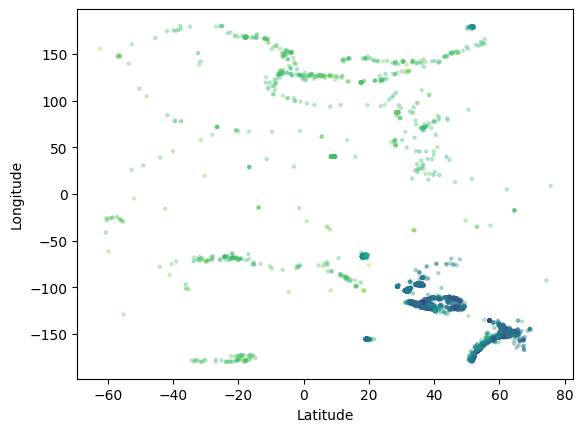

In [113]:
lat = earthquake_data['latitude']
lng = earthquake_data['longitude']
mag = earthquake_data['mag']

fig, ax = plt.subplots()
eq_scatter = ax.scatter(lat, lng, s=5, c=mag, marker='o', cmap='viridis', alpha=0.3)

# cbar =
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
# ax.legend()

ax.plot()

<Axes: xlabel='extracted_place'>

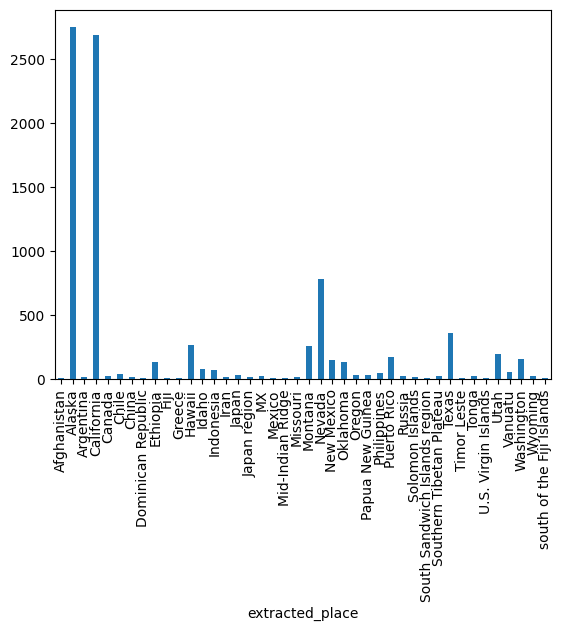

In [ ]:
import re
# ^[^,]*$ # no comma
# .*,\s(.*) # capture everything after , and space

def extract_place(row):
    if row['two_part_place']:
        match = re.search(r'.*,\s(.*)', row['place'])
        if match.group(1) == 'CA':
            return 'California'
        return match.group(1)
    else:
        return row['place']

two_parts_place = earthquake_data['place'].str.contains(r',\s', regex=True)
earthquake_data['two_part_place'] = two_parts_place
extracted_place = earthquake_data.apply(extract_place, axis=1)
earthquake_data = earthquake_data.assign(extracted_place=extracted_place)
earthquake_data_sort_lat = earthquake_data.sort_values(by=['latitude'])
# print(earthquake_data)
# print(earthquake_data['extracted_place'])

# earthquake_data_filtered = earthquake_data[earthquake_data['extracted_place'].size() < 5]
data_grp_place = earthquake_data_sort_lat.groupby('extracted_place').size()
data_grp_place_filtered = data_grp_place[data_grp_place > 10]

# print(data_grp_place[data_grp_place[]])

data_grp_place_filtered.plot(kind='bar')

# earthquake_data.groupby(['place']).size()